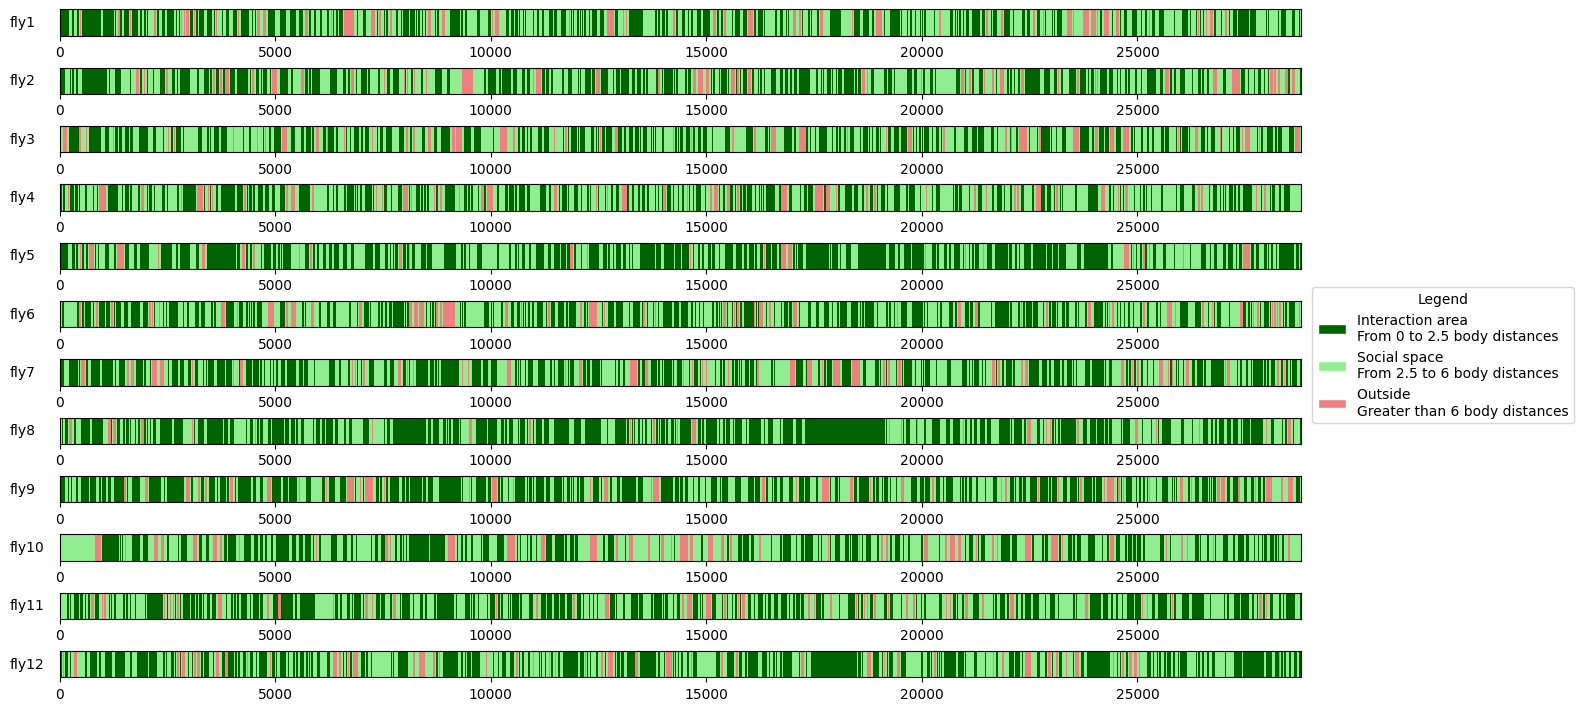

SystemExit: 

/home/milky/drosophila-isolation/.venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [16]:
import os, sys

import toml
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import colors as c
from matplotlib.patches import Patch

from src import settings
from src.utils import fileio


# TREATMENT = os.environ["TREATMENT"]
TREATMENT = "Cs_5DIZ"

CONFIG_PATH = os.path.join(settings.CONFIG_DIR, "main.toml")
with open(CONFIG_PATH, "r") as file:
    main_config = toml.load(file)

DISTANCES_DIR = os.path.join(settings.OUTPUT_DIR, "1_3_find_closest_neighbour", TREATMENT)
distances = fileio.load_files_from_folder(DISTANCES_DIR)

# SCRIPT_OUTPUT = os.path.join(settings.OUTPUT_DIR, "1_3_find_closest_neighbour", TREATMENT)
# os.makedirs(SCRIPT_OUTPUT, exist_ok=True)

for distances_name, distances_path in distances.items():
    df = pd.read_csv(distances_path, index_col=0)

    numeric_part = df.columns.str.extract(r"(\d+)").astype(int)
    sorted_columns = df.columns[np.argsort(numeric_part.values.flatten())]
    df = df.reindex(columns=sorted_columns)

    df_min = df.min().min()
    df_max = df.max().max()

    colors = ["darkgreen", "lightgreen", "lightcoral"]
    INTERACTION_DISTANCE = 2.5
    SOCIAL_SPACE = 6
    thresholds = [df_min, INTERACTION_DISTANCE, SOCIAL_SPACE, df_max]
    cmap, norm = c.from_levels_and_colors(thresholds, colors)
    fig, axes = plt.subplots(nrows=12, ncols=1, figsize=(13, 7), constrained_layout=True)

    for i, ax in enumerate(axes):
        cax = ax.imshow([df.iloc[:, i]], aspect="auto", cmap=cmap, norm=norm)
        ax.text(
            -0.04, 0.5, df.columns[i].replace(".csv", ""), transform=ax.transAxes, ha="left", va="center", rotation=0
        )
        ax.get_yaxis().set_visible(False)

    normalized_ticks = [(x - df_min) / (df_max - df_min) for x in [0, 2.5, 6]]

    legend_elements = [
        Patch(facecolor="darkgreen", edgecolor="white", label="Interaction area \nFrom 0 to 2.5 body distances"),
        Patch(facecolor="lightgreen", edgecolor="white", label="Social space \nFrom 2.5 to 6 body distances"),
        Patch(facecolor="lightcoral", edgecolor="white", label="Outside \nGreater than 6 body distances"),
    ]
    fig.legend(handles=legend_elements, loc="center left", bbox_to_anchor=(1, 0.5), title="Legend")
    plt.show()

    # df_normalized = (df - df_min) / (df_max - df_min)
    # fig, axes = plt.subplots(nrows=12, ncols=1, figsize=(13, 7), constrained_layout=True)
    # for i, ax in enumerate(axes):
    #     col_data = df_normalized.iloc[:, i]
    #     cax = ax.imshow([col_data], aspect="auto", cmap="bwr")
    #     ax.text(
    #         -0.04, 0.5, df.columns[i].replace(".csv", ""), transform=ax.transAxes, ha="left", va="center", rotation=0
    #     )
    #     ax.get_yaxis().set_visible(False)

    # plt.show()

    sys.exit()

    # TODO
    ## SAVE FIGURES TO REPORT FOLDER

In [18]:
bins = [-float("inf"), 2.5, 8.5, float("inf")]
labels = ["I", "S", "O"]

df_discretized = df.apply(lambda x: pd.cut(x, bins=bins, labels=labels))
df_discretized["I_count"] = df_discretized.apply(lambda row: (row == "I").sum(), axis=1)
df_discretized["S_count"] = df_discretized.apply(lambda row: (row == "S").sum(), axis=1)
df_discretized["O_count"] = df_discretized.apply(lambda row: (row == "O").sum(), axis=1)

In [20]:
row_with_most_I = df_discretized["I_count"].idxmax()
row_with_most_S = df_discretized["S_count"].idxmax()
row_with_most_O = df_discretized["O_count"].idxmax()

print(f"Row with the most 'I': {row_with_most_I}")
print(f"Row with the most 'S': {row_with_most_S}")
print(f"Row with the most 'O': {row_with_most_O}")
# print("Row details I:")
# print(df_discretized.loc[row_with_most_I])
# print("Row details S:")
print(df_discretized.loc[row_with_most_S])
# print("Row details O:")
# print(df_discretized.loc[row_with_most_O])

Row with the most 'I': 11666
Row with the most 'S': 474
Row with the most 'O': 7240
fly1.csv      S
fly2.csv      S
fly3.csv      S
fly4.csv      S
fly5.csv      S
fly6.csv      S
fly7.csv      S
fly8.csv      S
fly9.csv      S
fly10.csv     S
fly11.csv     S
fly12.csv     S
I_count       0
S_count      12
O_count       0
Name: 474, dtype: object


In [2]:
INTERACTION_DISTANCE = 2.5
SOCIAL_SPACE = 6

less_equal_body_distance = (df.apply(lambda x: (x <= INTERACTION_DISTANCE).sum()) / len(df)) * 100
inside_social_space = (df.apply(lambda x: ((x > INTERACTION_DISTANCE) & (x <= SOCIAL_SPACE)).sum()) / len(df)) * 100
outside_social_space = (df.apply(lambda x: (x > SOCIAL_SPACE).sum()) / len(df)) * 100

result = pd.DataFrame(
    {
        f"In Int space": less_equal_body_distance,
        f"In Soc. Space, out of Int. ": inside_social_space,
        f"Out of Soc. Space": outside_social_space,
    }
)

print(result)

           In Int space  In Soc. Space, out of Int.   Out of Soc. Space
fly1.csv      45.881944                    41.927083          12.190972
fly2.csv      47.555556                    40.427083          12.017361
fly3.csv      51.263889                    37.677083          11.059028
fly4.csv      46.770833                    44.211806           9.017361
fly5.csv      49.892361                    40.298611           9.809028
fly6.csv      53.163194                    37.809028           9.027778
fly7.csv      49.329861                    41.045139           9.625000
fly8.csv      49.194444                    40.111111          10.694444
fly9.csv      49.548611                    40.142361          10.309028
fly10.csv     47.559028                    41.145833          11.295139
fly11.csv     50.194444                    40.513889           9.291667
fly12.csv     52.868056                    38.472222           8.659722


In [12]:
DISTANCES_DIR = os.path.join(settings.OUTPUT_DIR, "1_3_find_closest_neighbour", TREATMENT)

df = pd.read_csv(DISTANCES_DIR)
# distances_name

,fly8.csv,fly6.csv,fly11.csv,fly7.csv,fly12.csv,fly1.csv,fly10.csv,fly2.csv,fly4.csv,fly9.csv,fly5.csv,fly3.csv
0,5.30,2.53,4.16,2.19,2.98,1.17,4.22,2.22,2.52,1.12,1.88,3.52
1,5.30,2.53,4.16,2.19,2.98,1.17,4.22,2.22,2.52,1.12,1.88,3.52
2,5.29,2.78,4.25,2.09,2.37,1.15,4.31,2.12,2.40,1.11,1.90,3.81
3,5.28,2.93,4.26,2.05,2.13,1.21,4.32,2.08,2.16,1.16,1.87,3.87
4,5.29,3.16,4.32,2.04,1.98,1.22,4.38,2.07,2.01,1.17,1.87,3.81
...,...,...,...,...,...,...,...,...,...,...,...,...
28795,1.18,3.97,3.87,1.87,1.86,2.40,2.66,1.18,2.31,3.22,1.44,2.36
28796,1.07,3.97,3.87,1.84,1.84,2.52,2.52,1.06,2.46,3.28,1.39,2.52
28797,0.99,3.96,3.87,1.81,1.80,2.67,2.45,0.99,2.55,3.32,1.34,2.52
28798,1.02,3.97,3.87,1.79,1.79,2.82,2.35,1.01,2.65,3.41,1.32,2.41


In [ ]:
# df.mean()
df.plot.line(subplots=True, figsize=(16, 10))

plt.tight_layout()
plt.show()

df.mean(axis=1).plot.line(figsize=(14, 3))
plt.show()